<h3> K Means Clustering Unsupervised Classification of 77 Chicago Community Areas by 6 Standardized Hardship Indicators</h3>

Datasets:  standardizedindictors.xlsx

1) import the usual libraries

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt # plotting library

2) Import library for KMeans clustering

In [2]:
import sklearn
from sklearn.cluster import KMeans 

3) Read homicide data

In [3]:
hom_df = pd.read_excel('standardizedindicators.xlsx')
hom_df.head(2)

,Community,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17,HOM14,HOM17,LAT,LON
0,Albany Park,47.0,-0.705481,0.667993,-0.470891,1.42992,-0.353466,-0.165118,45.7,-0.706842,0.506067,-0.530539,1.562581,-0.418499,-0.183089,2,1,41.97,-87.72
1,Archer Heights,54.4,-0.193683,1.136956,0.471085,1.51857,-0.672245,-0.605100,56.1,-0.442634,1.090575,0.742190,1.945762,-0.473646,-0.607925,0,3,41.81,-87.73


4) Create dataframe with just HI and HOM 2017 info

In [4]:
HIHOM=hom_df[["UNEMP17","NOHS17","DEP17","HOUS17","POV17","INC17"]]
HIHOM.head()

,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17
0,-0.706842,0.506067,-0.530539,1.562581,-0.418499,-0.183089
1,-0.442634,1.090575,0.742190,1.945762,-0.473646,-0.607925
2,-0.128101,2.243355,0.773232,0.552377,1.575995,-0.574983
3,0.035456,-0.257040,0.229994,-0.283653,-0.896442,-0.290469
4,1.054544,0.018978,0.586979,-0.771338,0.629300,-0.609312


5) Use the KMeans() function to make n_clusters=2 clusters and get the labels indicating which cluster each point belongs to.

In [5]:
# Fit the k means model
k_means = KMeans(init="k-means++", n_clusters=2, n_init=2)
k_means.fit(HIHOM)
#Get Labels
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

6) Add the Labels to hom_df

In [6]:
hom_df["CLASS"]=k_means_labels
hom_df.head(77)

,Community,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17,HOM14,HOM17,LAT,LON,CLASS
0,Albany Park,47.0,-0.705481,0.667993,-0.470891,1.429920,-0.353466,-0.165118,45.7,-0.706842,0.506067,-0.530539,1.562581,-0.418499,-0.183089,2,1,41.9700,-87.7200,1
1,Archer Heights,54.4,-0.193683,1.136956,0.471085,1.518570,-0.672245,-0.605100,56.1,-0.442634,1.090575,0.742190,1.945762,-0.473646,-0.607925,0,3,41.8100,-87.7300,1
2,Armour Square,56.6,-0.098464,1.269681,0.441181,-0.077137,1.438592,-0.647511,63.5,-0.128101,2.243355,0.773232,0.552377,1.575995,-0.574983,1,0,41.8333,-87.6333,1
3,Ashburn,37.6,-0.348413,-0.269932,0.052429,-0.343089,-0.999640,-0.154402,40.8,0.035456,-0.257040,0.229994,-0.283653,-0.896442,-0.290469,7,6,41.7500,-87.7100,0
4,Auburn Gresham,53.5,1.436932,-0.128359,0.800029,-0.549940,0.516716,-0.610001,51.5,1.054544,0.018978,0.586979,-0.771338,0.629300,-0.609312,14,27,41.7400,-87.6600,1
5,Austin,55.7,0.734696,0.455633,0.545845,0.247914,0.637335,-0.672343,53.1,0.337408,0.392413,0.493853,0.099527,0.647682,-0.660575,37,82,41.9000,-87.7600,1
6,Avalon Park,42.4,0.746598,-0.783136,0.515941,-0.638590,-0.431007,-0.154990,47.6,0.639360,-0.224567,0.804274,-0.771338,0.224886,-0.372072,1,4,41.7500,-87.5900,1
7,Avondale,40.3,-0.884016,0.606055,-0.620411,0.011513,-0.448238,-0.295813,38.6,-0.908143,0.847030,-0.763355,-0.283653,-0.427690,-0.124603,0,2,41.9400,-87.7100,0
8,Belmont Craigin,57.0,-0.205585,1.720947,0.291661,1.489020,-0.336235,-0.639669,55.9,-0.442634,1.788738,0.183431,1.423243,-0.216292,-0.638671,5,8,41.9300,-87.7600,1
9,Beverly,23.3,-1.014941,-1.473308,0.396325,-1.022742,-1.568274,1.047004,24.5,-0.820074,-1.442292,0.664584,-1.328692,-1.429532,0.922547,0,0,41.7100,-87.6800,0


7) Create a scatter plot which shows the classes with homicide counts for select communities. 

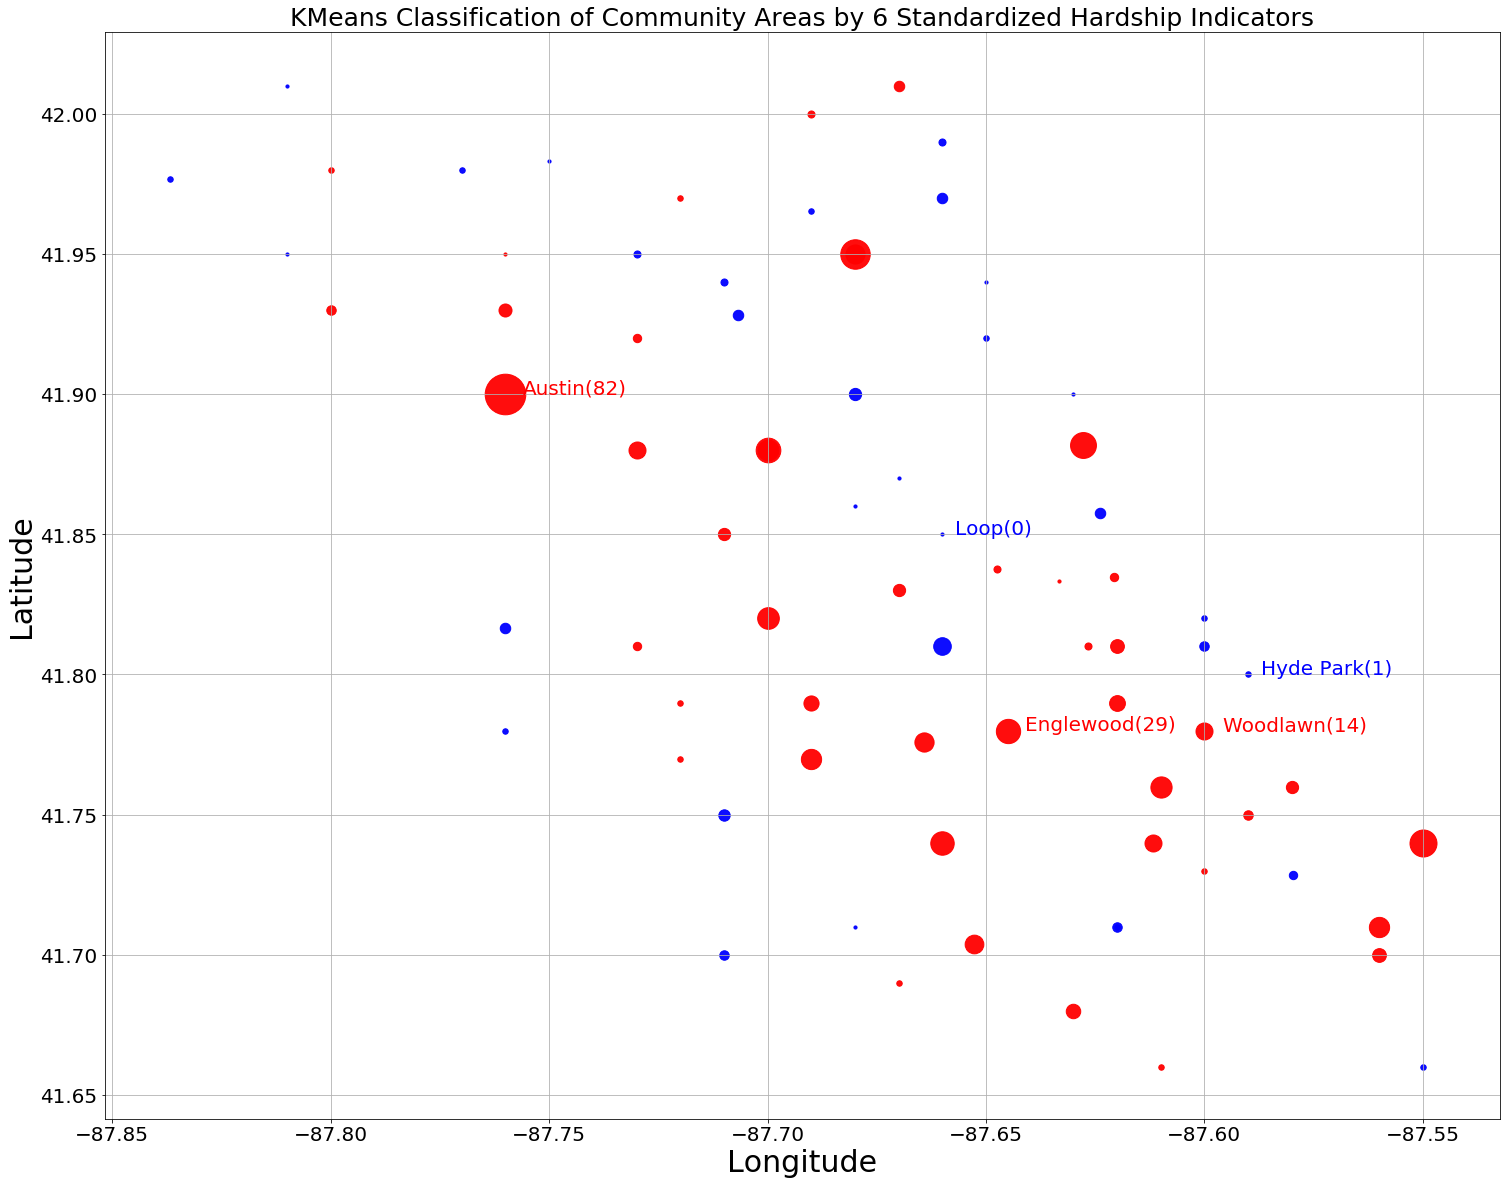

In [7]:
fig=plt.figure(figsize=(25,20))

for i in hom_df.index:
    if hom_df.loc[i,"CLASS"]==0:
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=20*hom_df.loc[i,'HOM17']+10,color='b', alpha=0.95)
        if hom_df.loc[i,"Community"] in ["Loop","Hyde Park"]:
            plt.gca().text(hom_df.loc[i,'LON']+.003, hom_df.loc[i,'LAT'], hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
    else:
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=20*hom_df.loc[i,'HOM17']+10,color='r', alpha=0.95)
        if hom_df.loc[i,"Community"] in ["Woodlawn","Austin","Englewood"]:
            plt.gca().text(hom_df.loc[i,'LON']+.004,hom_df.loc[i,'LAT'], hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)

#plt.gca().set_facecolor('lightgray')
plt.gca().grid()
plt.yticks(fontsize=20) 
plt.xticks(fontsize=20)
#title
plt.title('KMeans Classification of Community Areas by 6 Standardized Hardship Indicators',size=25)
plt.xlabel("Longitude",size=30)
plt.ylabel("Latitude",size=30)
fig.savefig("KMeansHIHOM.png") 
#show the plot
plt.show()                    
